In [22]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

import sys
sys.path.insert(1, "/Users/jeangomes/Desktop/tmp/ExtragalacticKinematics/src/python")
from PyKinematicalBroadening import kinematicalbroadening

Text(0, 0.5, '$F_\\lambda$')

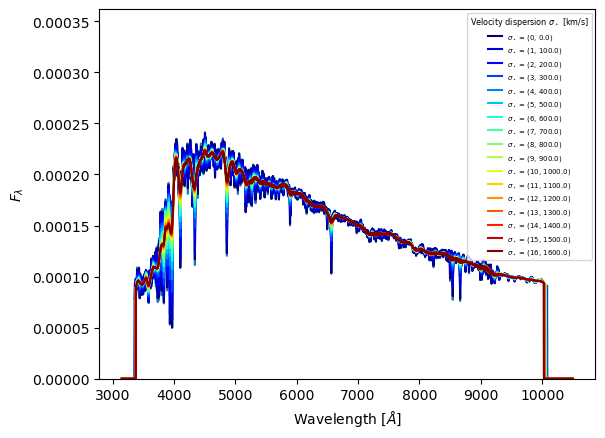

In [23]:
# Read spectrum

file = '/Users/jeangomes/Desktop/tmp/ExtragalacticKinematics/src/python/test_spectrum.spec'
o = open(file)
r = o.readlines()
o.close()

l = [] ; f = []
for i in enumerate(r):
    i_split = i[1].split()
    if i_split[0] != '#':
        #print(i_split)
        l.append(i_split[0]) ; f.append(i_split[1])

l = np.array(l, dtype=float) ; f = np.array(f, dtype=float) 

# Non-equally spaced wavelength steps
z = 0.12
lambda_o = np.arange(3000,9001,1.) * (1. + z)
fluxes_o = np.interp(lambda_o,l,f)
Nlambdao = lambda_o.size

# New non-equally spaced wavelength steps
z = 0.05
lambda_s = np.arange(3000.,10000.,2.) * (1 + z)
vc0_gals = 0.0
Ni_Gauss = 51
vd_sigma = 0.0

# Loop over different velocity dispersion broadenings
vd = np.arange(0.,1650.,100.)

n = vd.size
colors = pl.cm.jet(np.linspace(0,1,n))

#plt.xlim(3000,9000)
plt.plot(lambda_o,fluxes_o)

for i in enumerate(vd):
    #Ni_Gauss = max(51,int( i[1] ) + 1)
    #if (Ni_Gauss % 2) == 0:
    #    Ni_Gauss += 1
        
    #print('vd = {0:}'.format(i[1]))
    fluxes_s, IskeepOn = kinematicalbroadening( lambda_o, fluxes_o, lambda_s, vc0_gals, vd_sigma+i[1], Ni_Gauss=Ni_Gauss, fill_val=0.0, verbosity=0 )
    plt.plot(lambda_s,fluxes_s,label=r'$\sigma_\star$ = {0:}'.format(i), color=colors[i[0]])

legend = plt.legend(loc=1, prop={'size': 5}, title=r'Velocity dispersion $\sigma_\star$ [km/s]')
legend.get_title().set_fontsize('5')
plt.setp( legend.get_title(),fontsize='xx-small')

plt.ylim( -0.0, 1.5*np.max(fluxes_o) )

plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'$F_\lambda$')